# Data Vis part 3

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# 1
data = pd.read_csv("mpg(1).csv")
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


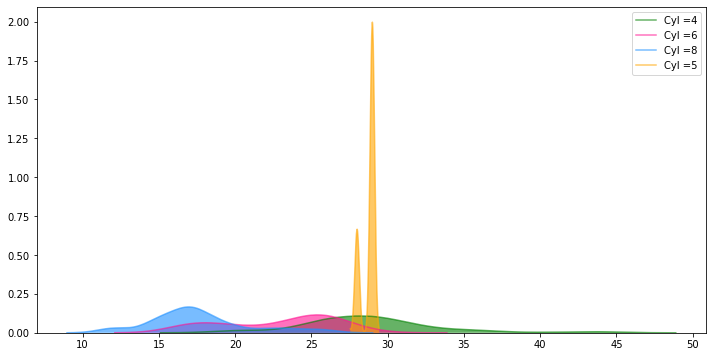

In [3]:
# for loop used to avoid copy/pasting for filters equal to different values

plt.figure(figsize = (12,6))
colors = ["green", "deeppink", "dodgerblue", "orange"]
for i in range(len(data.cyl.unique())):
    sns.kdeplot(data.loc[data.cyl == data.cyl.unique()[i], 'hwy'], # initializes a density plot from seaborn, filter only for 'cyl' = 4
                shade = True, # shades the region under curve
                color = colors[i],
                label = 'Cyl =' + str(data.cyl.unique()[i]),
                alpha = 0.6
               )
plt.show()

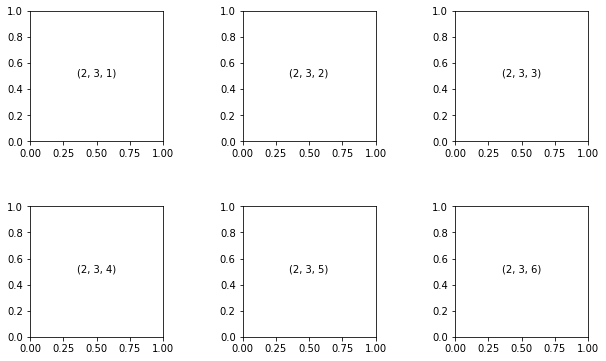

In [4]:
# 2 Create a 2x3 grid
plt.figure(figsize = (10,6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.6) # adjust heightspace and widthspace between subplots
for i in range(1,7):
    plt.subplot(2,3,i) # initialize a SINGLE subplot, last argument acts as an index to choose a subplot 
    plt.text(x = 0.5, y = 0.5, s = str((2,3,i)), ha = 'center') # x,y specify text position on x and y axes,
# s stands for text, ha stands for horizontal allignment
plt.show()

<Figure size 720x432 with 0 Axes>

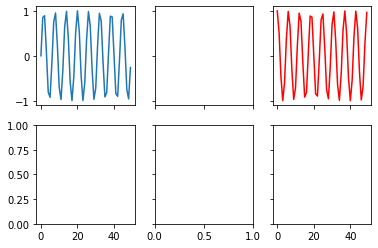

In [5]:
# 3 Create a 2x3 graph with sin and cos plots

plt.figure(figsize = (10,6))
fig, ax = plt.subplots(2,3, sharex = 'col', sharey = 'row') # initialize a 2 by 3 SET of sideplots, sharex indicates that 
# columns are shared, for more than one subplot; same with sharey for rows
x = np.linspace(0,50) # equivalent to range()
ax[0,0].plot(np.sin(x)) # row = 0, column = 0, sin(x) comes from numpy
ax[0,2].plot(np.cos(x), color = "red")
plt.show()

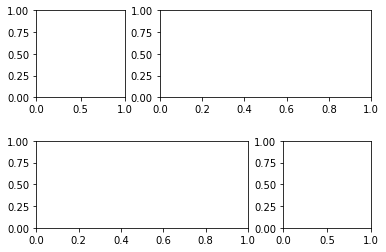

In [6]:
# 4
fig = plt.figure() # assign variable for further manipulation
grid = plt.GridSpec(2,3,wspace = 0.4, hspace = 0.5) # grid specification
fig.add_subplot(grid[0,0]) # add individual subplots to existing figure skeleton
fig.add_subplot(grid[0,1:3]) # includes spaces reserved for 1st and 2nd columns
fig.add_subplot(grid[1,:2])
fig.add_subplot(grid[1,2])
plt.show()

[Text(0, 0.5, 'hwy'),
 Text(0.5, 0, 'displ'),
 Text(0.5, 1.0, 'Scatterplot with Boxplots \n displ vs hwy')]

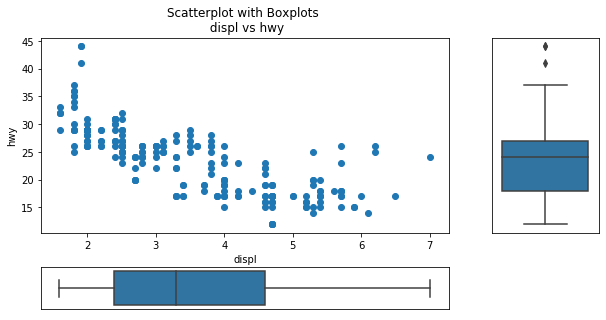

In [7]:
# 5, wrapping it all together

fig = plt.figure(figsize = (10, 5))
grid = plt.GridSpec(4,4, wspace = 0.4, hspace = 0.8)
ax_main = fig.add_subplot(grid[:3,:3])
ax_bottom = fig.add_subplot(grid[3,:3])
ax_right = fig.add_subplot(grid[:3,3])

# plot the main graph

ax_main.scatter(data.displ, data.hwy)

# plot the right boxplot 

sns.boxplot(data.hwy, ax = ax_right, orient = 'v') # boxplot using seaborn, specify data and subplot in the function itself,
# orient transposes the boxplot position from default horizontal
ax_right.set(xticks = [], yticks = [], ylabel = "") # removes unnecessary elements from inital visualization

# plot the bottom boxplot 
## based on the above illustration
sns.boxplot(data.displ, ax = ax_bottom, orient = 'h')
ax_bottom.set(xticks = [], yticks = [], xlabel = "") 

ax_main.set(title = "Scatterplot with Boxplots \n displ vs hwy", 
            xlabel = "displ",
            ylabel = "hwy")

In [8]:
# 6 
data = pd.read_csv("economics.csv")
data.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


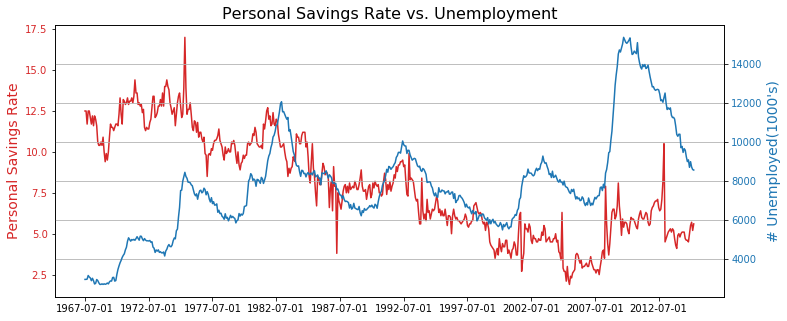

In [26]:
fig = plt.figure(figsize = (12,5))
ax = plt.gca() 
plt.plot(data.date, data.psavert, color = 'tab:red') # different kind of red

## set the main y-axis (left)
ax.tick_params(axis = 'y', labelcolor = 'tab:red')
ax.set_ylabel("Personal Savings Rate", color = 'tab:red', fontsize = 14)

## set the left y-axis ticks
ax.set_yticks(np.arange(2.5,20,2.5))

# set the secondary y-axis (right)
ax_right = ax.twinx()
ax_right.plot(data.date, data.unemploy, color = 'tab:blue')
ax_right.tick_params(axis = 'y', labelcolor = 'tab:blue')
ax_right.set_ylabel("# Unemployed(1000's)", color = 'tab:blue', fontsize = 14)

## set the x-axis directly 
ax.set_xticks(np.arange(0, len(data.date), 60)) # xticks are now separated by a 5 year period

plt.grid()
plt.title("Personal Savings Rate vs. Unemployment", fontsize = 16)
plt.show()

In [10]:
574/12

47.833333333333336